<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_3_6_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n20.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,9.765788e+06,9.766028e+06,3.568613e+05,9.409166e+06
1,0.0,1.0,41.321385,70.807138,64.285975,-7.515285e+06,-7.515099e+06,-1.230537e+05,-7.392045e+06
2,0.0,2.0,97.569298,71.702146,80.680950,3.756857e+06,3.757117e+06,1.127810e+06,2.629306e+06
3,0.0,3.0,95.847263,60.930988,21.264605,2.881087e+06,2.881275e+06,7.775524e+05,2.103722e+06
4,0.0,4.0,36.355496,24.921419,84.847584,-5.600963e+04,-5.585351e+04,-4.823082e+05,4.264547e+05
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-7.220704e+06,-7.220480e+06,-1.912461e+05,-7.029234e+06
249996,999.0,246.0,35.459513,28.969407,64.695515,8.178072e+04,8.191984e+04,-3.114495e+05,3.933693e+05
249997,999.0,247.0,60.281445,89.820202,64.100453,-1.324214e+06,-1.323990e+06,-4.467854e+05,-8.772046e+05
249998,999.0,248.0,29.142842,36.286090,55.851661,-5.620249e+05,-5.618936e+05,-4.792607e+05,-8.263295e+04


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,9.765788e+06,9.766028e+06,3.568613e+05,9.409166e+06
1,0.0,1.0,41.321385,70.807138,64.285975,-7.515285e+06,-7.515099e+06,-1.230537e+05,-7.392045e+06
2,0.0,2.0,97.569298,71.702146,80.680950,3.756857e+06,3.757117e+06,1.127810e+06,2.629306e+06
3,0.0,3.0,95.847263,60.930988,21.264605,2.881087e+06,2.881275e+06,7.775524e+05,2.103722e+06
4,0.0,4.0,36.355496,24.921419,84.847584,-5.600963e+04,-5.585351e+04,-4.823082e+05,4.264547e+05
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-7.220704e+06,-7.220480e+06,-1.912461e+05,-7.029234e+06
249996,999.0,246.0,35.459513,28.969407,64.695515,8.178072e+04,8.191984e+04,-3.114495e+05,3.933693e+05
249997,999.0,247.0,60.281445,89.820202,64.100453,-1.324214e+06,-1.323990e+06,-4.467854e+05,-8.772046e+05
249998,999.0,248.0,29.142842,36.286090,55.851661,-5.620249e+05,-5.618936e+05,-4.792607e+05,-8.263295e+04


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    56.430038  74.617667  ...  3.568613e+05  9.409166e+06
      1.0    41.321385  70.807138  ... -1.230537e+05 -7.392045e+06
      2.0    97.569298  71.702146  ...  1.127810e+06  2.629306e+06
      3.0    95.847263  60.930988  ...  7.775524e+05  2.103722e+06
      4.0    36.355496  24.921419  ... -4.823082e+05  4.264547e+05
...                ...        ...  ...           ...           ...
999.0 245.0  96.120114  89.727149  ... -1.912461e+05 -7.029234e+06
      246.0  35.459513  28.969407  ... -3.114495e+05  3.933693e+05
      247.0  60.281445  89.820202  ... -4.467854e+05 -8.772046e+05
      248.0  29.142842  36.286090  ... -4.792607e+05 -8.263295e+04
      249.0  30.233196  79.460010  ... -9.063964e+05 -1.661343e+07

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    56.430038  74.617667  ...  3.568613e+05  9.409166e+06
      1.0    41.321385  70.807138  ... -1.230537e+05 -7.392045e+06
      2.0    97.569298  71.702146  ...  1.127810e+06  2.629306e+06
      3.0    95.847263  60.930988  ...  7.775524e+05  2.103722e+06
      4.0    36.355496  24.921419  ... -4.823082e+05  4.264547e+05
...                ...        ...  ...           ...           ...
999.0 245.0  96.120114  89.727149  ... -1.912461e+05 -7.029234e+06
      246.0  35.459513  28.969407  ... -3.114495e+05  3.933693e+05
      247.0  60.281445  89.820202  ... -4.467854e+05 -8.772046e+05
      248.0  29.142842  36.286090  ... -4.792607e+05 -8.263295e+04
      249.0  30.233196  79.460010  ... -9.063964e+05 -1.661343e+07

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,9.765788e+06,9.766028e+06,3.568613e+05,9.409166e+06
1,0.0,1.0,41.321385,70.807138,64.285975,-7.515285e+06,-7.515099e+06,-1.230537e+05,-7.392045e+06
2,0.0,2.0,97.569298,71.702146,80.680950,3.756857e+06,3.757117e+06,1.127810e+06,2.629306e+06
3,0.0,3.0,95.847263,60.930988,21.264605,2.881087e+06,2.881275e+06,7.775524e+05,2.103722e+06
4,0.0,4.0,36.355496,24.921419,84.847584,-5.600963e+04,-5.585351e+04,-4.823082e+05,4.264547e+05
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-7.220704e+06,-7.220480e+06,-1.912461e+05,-7.029234e+06
249996,999.0,246.0,35.459513,28.969407,64.695515,8.178072e+04,8.191984e+04,-3.114495e+05,3.933693e+05
249997,999.0,247.0,60.281445,89.820202,64.100453,-1.324214e+06,-1.323990e+06,-4.467854e+05,-8.772046e+05
249998,999.0,248.0,29.142842,36.286090,55.851661,-5.620249e+05,-5.618936e+05,-4.792607e+05,-8.263295e+04


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    56.430038  74.617667  ...  3.568613e+05  9.409166e+06
      1.0    41.321385  70.807138  ... -1.230537e+05 -7.392045e+06
      2.0    97.569298  71.702146  ...  1.127810e+06  2.629306e+06
      3.0    95.847263  60.930988  ...  7.775524e+05  2.103722e+06
      4.0    36.355496  24.921419  ... -4.823082e+05  4.264547e+05
...                ...        ...  ...           ...           ...
999.0 245.0  96.120114  89.727149  ... -1.912461e+05 -7.029234e+06
      246.0  35.459513  28.969407  ... -3.114495e+05  3.933693e+05
      247.0  60.281445  89.820202  ... -4.467854e+05 -8.772046e+05
      248.0  29.142842  36.286090  ... -4.792607e+05 -8.263295e+04
      249.0  30.233196  79.460010  ... -9.063964e+05 -1.661343e+07

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

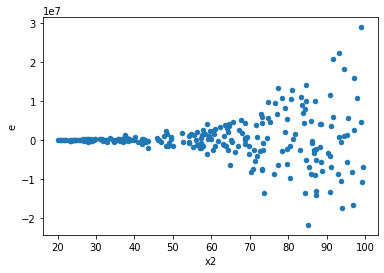

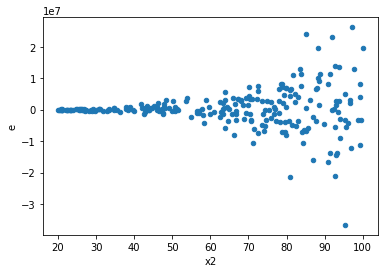

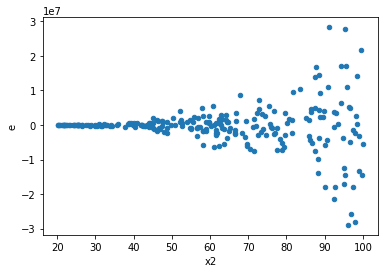

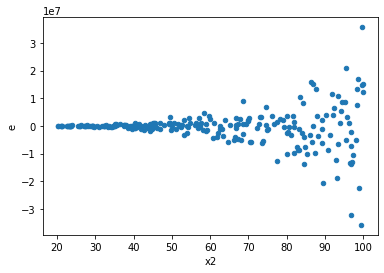

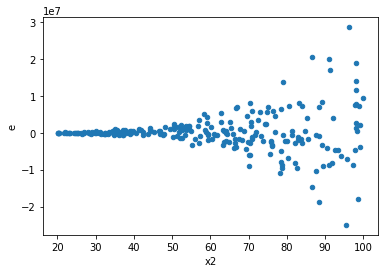

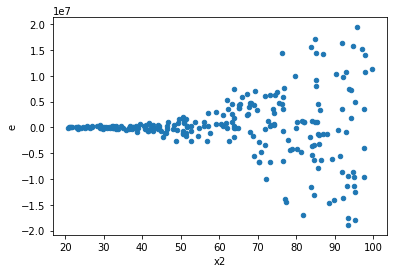

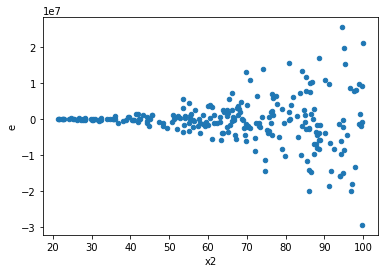

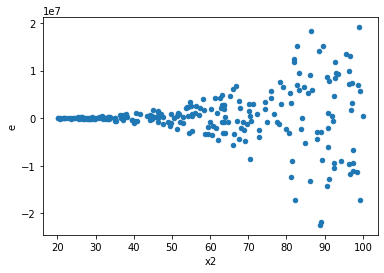

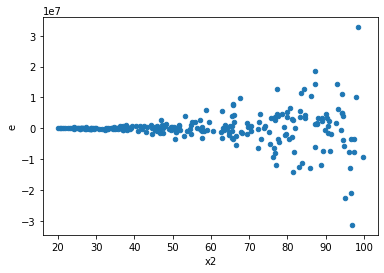

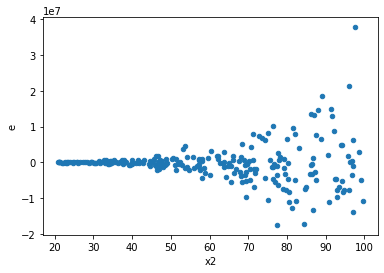

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,7855644721055071.0,32937142820106.12,81829632510990.33,343095237709.4388,238.50413388800922,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,9229745659522818.0,60234685157200.97,96143183953362.69,627444637054.1768,153.22974853167995,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,9956006556263540.0,60511667444445.22,103708401627745.2,630329869212.9711,164.53036210585321,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1.0309755730802698e+16,26139677824412.023,107393288862528.11,272288310670.9586,394.4102065854211,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,6727145498572519.0,26968674618197.613,70074432276797.07,280923693939.5585,249.44294051563264,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,7588639529079767.0,41810526037888.0,79048328427914.23,435526312894.6667,181.50069487772217,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,9377397281521562.0,216387741224468.4,97681221682516.27,2254038971088.2124,43.33608377469951,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,7100780006786810.0,22694746337995.77,73966458404029.27,236403607687.45593,312.8821050050079,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,6771535996811866.0,31621526768101.723,70536833300123.61,329390903834.39294,214.14323370504255,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,7855644721055071.0,32937142820106.12,81829632510990.33,343095237709.4388,238.50413388800922,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,9229745659522818.0,60234685157200.97,96143183953362.69,627444637054.1768,153.22974853167995,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,9956006556263540.0,60511667444445.22,103708401627745.2,630329869212.9711,164.53036210585321,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1.0309755730802698e+16,26139677824412.023,107393288862528.11,272288310670.9586,394.4102065854211,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,6727145498572519.0,26968674618197.613,70074432276797.07,280923693939.5585,249.44294051563264,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,7588639529079767.0,41810526037888.0,79048328427914.23,435526312894.6667,181.50069487772217,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,9377397281521562.0,216387741224468.4,97681221682516.27,2254038971088.2124,43.33608377469951,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,7100780006786810.0,22694746337995.77,73966458404029.27,236403607687.45593,312.8821050050079,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,6771535996811866.0,31621526768101.723,70536833300123.61,329390903834.39294,214.14323370504255,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64